PREDICTIVE INTERLOCKS PROJECT

Andrew Ng, LinkedIn post, 29/05/2021, "AI Systems = Code (model/algorithm) + Data. Most academic benchmarks/competitions hold the Data fixed, and let teams work on the Code. Thinking of organising something where we hold the Code fixed, and ask teams to work on the Data. 
Hoping this will more closely reflect ML application practice, and also spur innovative research on data-centric AI development. What do you think?"

The next Normal Conducting Linac (NCL) configuration is assumed:


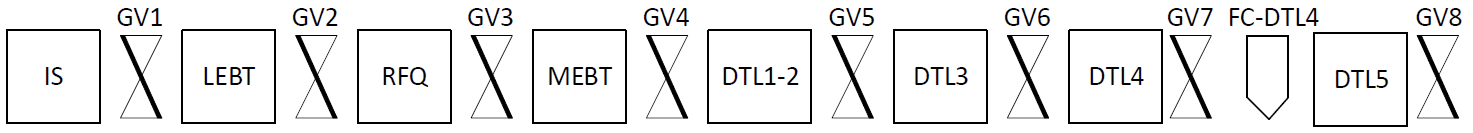

This project focuses on the Normal Conducting LINAC (NCL) at ESS, and therefore only the first seven vacuum sector gate valves (GV1 to GV7) will be considered. Beam destinations are restricted to Ion Source (for plasma generation), LEBT-FC (located just after GV2), MEBT-FC (located just after GV4), DTL2-FC (located just after GV5) and DTL4-FC (located just after GV7). In the figure, only the DTL4-FC appears visible as it ends the NCL section.

Predictors: Total of 18 distributed as
- Beam Mode indicating if there is beam or not (BM=0 or no beam/BM=1 or beam)
- Beam Destination: five destinations ISrc (0), LEBT-FC (1), MEBT-FC (2), DTL2-FC (3) and DTL4-FC (4) are possible. ISrc destination is used for plasma conditioning. We use three bits to binary codifying each beam destination
- 7 Valves positions (open=1/close=0). One per valve
- 7 Vacuum pressure status through the boolean variable Vacuum Beam Permit or VBP (ok=1/nok=0). One per valve too.

Target:
- Beam Permit (BP ok=1/BP nok=0) where ok means that beam is allowed, however nok means beam has to be stopped or interlocked

STEPS FOR DATA GENERATION:
 1. Generate all the boolean combinations of our predictors as a Pandas Dataframe
 2. Define the functions to implement the interlocks logic of our target (BP)
 3. Obtain the target (BP) column
 4. Add the target column to the original dataframe conforming the final full dataset

1. First we generate all the boolean combinations of our predictors to finally obtain a Pandas dataframe like:

In [1]:
import pandas

Predictors = pandas.DataFrame(
{
    'BM':0,
    'BD_2':0,
    'BD_1':0,
    'BD_0':0,
    'GV1': 1, 'GV2': 0, 'GV3': 0, 'GV4':0, 'GV5':0, 'GV6':0, 'GV7':0,
    'VBP1':0, 'VBP2': 0, 'VBP3':0, 'VBP4':0, 'VBP5':0, 'VBP6':0, 'VBP7':0,
}, columns = ['BM', 'BD_2' ,'BD_1', 'BD_0', 'GV1', 'GV2', 'GV3', 'GV4', 'GV5', 'GV6', 'GV7', 'VBP1', 'VBP2', 'VBP3', 'VBP4', 'VBP5', 'VBP6', 'VBP7'], index=[0]
)

In [2]:
Predictors

,BM,BD_2,BD_1,BD_0,GV1,GV2,GV3,GV4,GV5,GV6,GV7,VBP1,VBP2,VBP3,VBP4,VBP5,VBP6,VBP7
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
#function to convert Decimal to Binary
def decimalToBinary(n,l):
    bin_value = bin(n).replace("0b","") #remove the binary indication 0b at the beginning of the string
    bin_value = bin_value.zfill(l) #fill with 0's to the left until completing l positions
    return str(bin_value)

print(decimalToBinary(7,8))

00000111


In [4]:
#Generate the truth table for all the 18 predictors conforming a pandas dataframe of 2*exp(18)=262144 rows
import numpy as np

predictor_list = [[0]*18]*262144 #generates a list of 262144 elements of lists of 18 elements each
predictor_np = np.array(predictor_list)

for i in range(262144): #for each boolean combination of the predictors
    i_str = decimalToBinary(i,18) #convert to binary with a lenght of 18 bits
    bin_list_np = np.array(list(i_str)) #generate numpy array from the list
    for j in range(18):
        predictor_np[i,j] = bin_list_np[j]

In [5]:
print(predictor_np)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]]


In [6]:
#Convert to Pandas dataframe
import pandas as pd

predictor_df = pd.DataFrame(predictor_np)
print(predictor_df)

        0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
0        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
1        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
2        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
3        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1
4        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
262139   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   0   1   1
262140   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   0   0
262141   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   0   1
262142   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   0
262143   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1

[262144 rows x 18 columns]


In [7]:
#Change column names of pandas dataframe to the names of the predictors
predictor_df.columns = ['BM', 'BD_2' ,'BD_1', 'BD_0', 'GV1', 'GV2', 'GV3', 'GV4', 'GV5', 'GV6', 'GV7', 'VBP1', 'VBP2', 'VBP3', 'VBP4', 'VBP5', 'VBP6', 'VBP7']

In [8]:
predictor_df.head()

,BM,BD_2,BD_1,BD_0,GV1,GV2,GV3,GV4,GV5,GV6,GV7,VBP1,VBP2,VBP3,VBP4,VBP5,VBP6,VBP7
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
#Save the dataframe as a CSV file
predictor_df.to_csv("predictors_total.csv")

 2. Define the functions to implement the interlocks logic of our target (BP)

For each row of the pandas dataframe (a boolean combination of the predictors), evaluate the next set of conditions:

- if BM is "No Beam" (BM=0), no interlock is requested, set BP to 1 (the rest of predictors are ignored)
- if there is beam (BM=1) and BD is "Ion Source", no interlock is requested, set BP to 1 (the rest of predictors are ignored) 
- if there is beam (BM=1) and BD is "LEBT FC", look into the first two GVs and VBPs and if the valves are opened and the vacuum pressures are ok, set BP to 1, else set it to 0 
- if there is beam (BM=1) and BD is "MEBT FC", look into the first four GVs and VBPs and if the valves are opened and the vacuum pressures are ok, set BP to 1, else set it to 0 
- if there is beam (BM=1) and BD is "DTL2-FC", look into the first five GVs and VBPs and if the valves are opened and the vacuum pressures are ok, set BP to 1, else set it to 0 
- if there is beam (BM=1) and BD is "DTL4-FC", look into the first seven GVs and VBPs and if the valves are opened and the vacuum pressures are ok, set BP to 1, else set it to 0                                   

In [10]:
#Interlocks logic
def interlock(row_df):
    """This function computes the interlock logic for a pandas row"""
    if (row_df.at['BM'] == 0): #No Beam, BP=1
        return 1;
    if (row_df.at['BM'] == 1):#Beam is there, let's evaluate BP
        if (row_df.at['BD_2'] == 0) and (row_df.at['BD_1'] == 0) and (row_df.at['BD_0'] == 0): #Beam Destination is Ion Source, BP=1
            return 1;
        if (row_df.at['BD_2'] == 0) and (row_df.at['BD_1'] == 0) and (row_df.at['BD_0'] == 1): #Beam Destination is LEBT-FC
            if (row_df.at['GV1'] == 1) and (row_df.at['GV2'] == 1) and (row_df.at['VBP1'] == 1) and (row_df.at['VBP2'] == 1):
                return 1;
            else:
                return 0;
        if (row_df.at['BD_2'] == 0) and (row_df.at['BD_1'] == 1) and (row_df.at['BD_0'] == 0): #Beam Destination is MEBT-FC
            if (row_df.at['GV1'] == 1) and (row_df.at['GV2'] == 1) and (row_df.at['GV3'] == 1) and (row_df.at['GV4'] == 1) and (row_df.at['VBP1'] == 1) and (row_df.at['VBP2'] == 1) and (row_df.at['VBP3'] == 1) and (row_df.at['VBP4'] == 1):
                return 1;
            else:
                return 0;
        if (row_df.at['BD_2'] == 0) and (row_df.at['BD_1'] == 1) and (row_df.at['BD_0'] == 1): #Beam Destination is DTL2-FC
            if (row_df.at['GV1'] == 1) and (row_df.at['GV2'] == 1) and (row_df.at['GV3'] == 1) and (row_df.at['GV4'] == 1) and (row_df.at['GV5'] == 1) and (row_df.at['VBP1'] == 1) and (row_df.at['VBP2'] == 1) and (row_df.at['VBP3'] == 1) and (row_df.at['VBP4'] == 1) and (row_df.at['VBP5'] == 1):
                return 1;
            else:
                return 0;

        if (row_df.at['BD_2'] == 1) and (row_df.at['BD_1'] == 0) and (row_df.at['BD_0'] == 0): #Beam Destination is DTL4-FC
            if (row_df.at['GV1'] == 1) and (row_df.at['GV2'] == 1) and (row_df.at['GV3'] == 1) and (row_df.at['GV4'] == 1) and (row_df.at['GV5'] == 1) and (row_df.at['GV6'] == 1) and (row_df.at['GV7'] == 1) and (row_df.at['VBP1'] == 1) and (row_df.at['VBP2'] == 1) and (row_df.at['VBP3'] == 1) and (row_df.at['VBP4'] == 1) and (row_df.at['VBP5'] == 1) and (row_df.at['VBP6'] == 1) and (row_df.at['VBP7'] == 1):
                return 1;
            else:
                return 0;
    
        else: #There is Beam but the destination is beyond DTL4-FC
            return 0;

3. Obtain the target column

In [11]:
target_list = [[0]*1]*262144 #generates a list of 262144 elements of lists of 1 elements each
target_np = np.array(target_list)

for i in range(262144): #for each boolean combination of the predictors, obtain the BP applying the interlocks logic
    target_np[i] = interlock(predictor_df.loc[i])
    
target_df = pd.DataFrame(target_np)
target_df.columns = ['BP']

In [12]:
target_df.head()

,BP
0,1
1,1
2,1
3,1
4,1


In [13]:
#Save the dataframe as a CSV file
target_df.to_csv("target_total.csv")

4. Add the target column to the end of the predictors dataframe to conform the final dataset for the project

In [14]:
project_dataset_df = predictor_df

In [15]:
project_dataset_df['BP'] = target_df['BP']

In [16]:
project_dataset_df.head()

,BM,BD_2,BD_1,BD_0,GV1,GV2,GV3,GV4,GV5,GV6,GV7,VBP1,VBP2,VBP3,VBP4,VBP5,VBP6,VBP7,BP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [17]:
#Save the dataframe as a CSV file
project_dataset_df.to_csv("project_dataset.csv")

STEPS FOR DATA ANALYSIS: Looking for insights
 - Datatypes of the dataset
 - Potential NULL values (data missings)
 - Dataset statistics
 - Dataset splitting into train and test

In [18]:
project_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262144 entries, 0 to 262143
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   BM      262144 non-null  int64
 1   BD_2    262144 non-null  int64
 2   BD_1    262144 non-null  int64
 3   BD_0    262144 non-null  int64
 4   GV1     262144 non-null  int64
 5   GV2     262144 non-null  int64
 6   GV3     262144 non-null  int64
 7   GV4     262144 non-null  int64
 8   GV5     262144 non-null  int64
 9   GV6     262144 non-null  int64
 10  GV7     262144 non-null  int64
 11  VBP1    262144 non-null  int64
 12  VBP2    262144 non-null  int64
 13  VBP3    262144 non-null  int64
 14  VBP4    262144 non-null  int64
 15  VBP5    262144 non-null  int64
 16  VBP6    262144 non-null  int64
 17  VBP7    262144 non-null  int64
 18  BP      262144 non-null  int64
dtypes: int64(19)
memory usage: 38.0 MB


All the predictors and the target are boolean values and no NULL data. We have 262144 rows, 19 columns (18 predictors,1 target)

If there were any NULL in the predictors, the idea is to set it to "0" and to compute the target for that row using our interlocks logic. 
The reason of this approach is:
- The predictors represent the information coming form sensors, and these sensors can fail and do not provide any number
- The target(BP) should be consistent with the information coming from sensors, so it should be calculated accordingly.

In [19]:
project_dataset_df.describe()

,BM,BD_2,BD_1,BD_0,GV1,GV2,GV3,GV4,GV5,GV6,GV7,VBP1,VBP2,VBP3,VBP4,VBP5,VBP6,VBP7,BP
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.566715
std,0.500001,0.500001,0.500001,0.500001,0.500001,0.500001,0.500001,0.500001,0.500001,0.500001,0.500001,0.500001,0.500001,0.500001,0.500001,0.500001,0.500001,0.500001,0.495530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


No NULLs in our dataset ("count" value equals the number of rows = 262144). Means and standard deviations are around 0.5. All values are between '0' (min) and '1' (max).
Let's analise graphically the data distribution

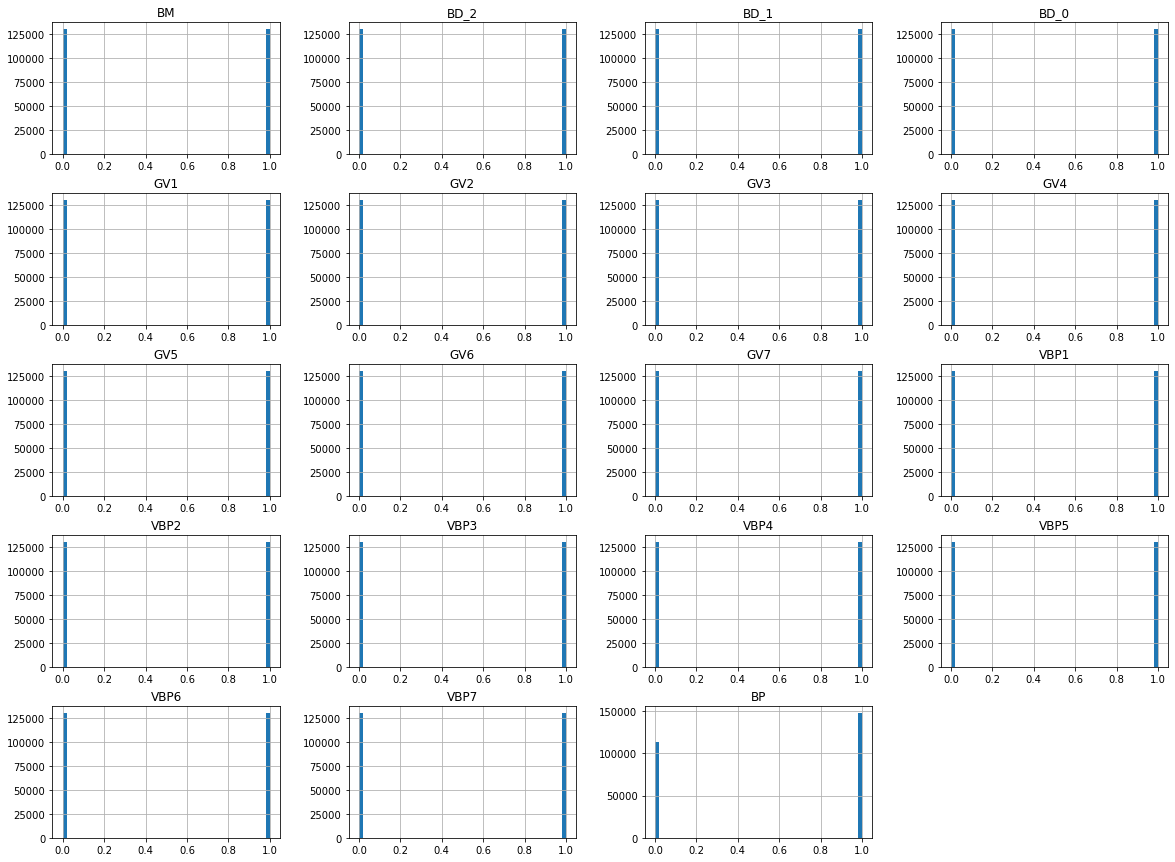

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
project_dataset_df.hist(bins=50, figsize=(20,15))
plt.show()

For all the predictors, no outliers are found. 
The distibution of values is quite equitative 50% for '0' and 50% for '1'. This happens also for the target value but with lower amount of '0'  than '1'.
The scale seems to be ok (all values between 0 and 1. No 'tails' are observed in the histograms, values are either '0' or '1'
Let's see a boxplot of the dataset

<AxesSubplot:>

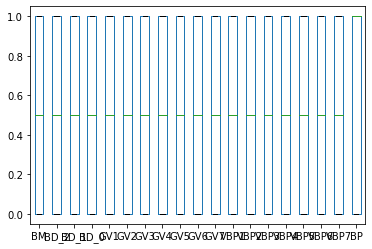

In [21]:
project_dataset_df.plot.box()

No outliers found. The second percentile (median) of BP is '1'. 

Before continuing and with the pupose to avoid bias, let's split the dataset into train (90%) and test (10%) specifying the 'random_state' parameter of the scikit-learn library.

In [22]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(project_dataset_df, test_size=0.1, random_state=24)

Let's study the stratification. First we should identify the critical predictor studying the correlations between our predictors and the target (BP).

In [23]:
project_dataset_df.corr()

,BM,BD_2,BD_1,BD_0,GV1,GV2,GV3,GV4,GV5,GV6,GV7,VBP1,VBP2,VBP3,VBP4,VBP5,VBP6,VBP7,BP
BM,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.874388
BD_2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.134619
BD_1,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.133403
BD_0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.118622
GV1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008507
GV2,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008507
GV3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000624
GV4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000624
GV5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000131
GV6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008


We can see that BM (0.87) shows the highest correlation values to the BP, followed by the Beam Destination bits. 
We divide the population into 5 categories (all the values higher than or equal to 1 are introduced in category 5) and we ensure that the test set is represented in the global set.

<AxesSubplot:>

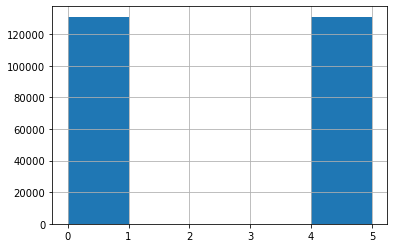

In [24]:
import numpy as np
project_dataset_df["category_BM"] = np.ceil(project_dataset_df["BM"] / 1.5)
project_dataset_df["category_BM"].where(project_dataset_df["BM"]<1, 5.0, inplace=True)
project_dataset_df["category_BM"].hist(bins=5) #for instance 5 categories

Same distribution for '0' and '1' in two categories.
Let's use the Stratified splitting mechanism of scikit-learn which is pretty important for small data cases

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, train_size=0.9,random_state=24)
for train_index, test_index in split.split(project_dataset_df,project_dataset_df["category_BM"]):
    train_set = project_dataset_df.loc[train_index]
    test_set = project_dataset_df.loc[test_index]

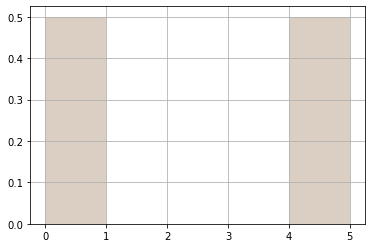

In [26]:
plt.figure()
project_dataset_df["category_BM"].hist(bins=5,density=True, alpha=.2)
test_set["category_BM"].hist(bins=5, density=True, alpha=0.2)
plt.show()

In [27]:
project_dataset_df["category_BM"].value_counts() / len(project_dataset_df)

5.0    0.5
0.0    0.5
Name: category_BM, dtype: float64

In [28]:
test_set["category_BM"].value_counts() / len(test_set)

0.0    0.500019
5.0    0.499981
Name: category_BM, dtype: float64

Similar distribution, therefore our test_set is valid even working with small data.
Now we should remove the "category_BM" column introduced before in the test and train sets.

In [29]:
test_set = test_set.drop(columns=["category_BM"])
train_set = train_set.drop(columns=["category_BM"])

#creamos copia del train set para no modificar el original
df = train_set.copy()

Let's see the correlations between our target (BP) and the predictors

In [30]:
df.corr()['BP'].sort_values(ascending=False)

BP      1.000000
GV1     0.009693
VBP1    0.008338
VBP2    0.008226
GV2     0.008224
GV5     0.002245
VBP4    0.001684
GV3     0.001193
VBP5    0.000654
GV6     0.000330
GV4     0.000187
VBP6    0.000023
VBP3   -0.000419
GV7    -0.000485
VBP7   -0.000596
BD_0   -0.119346
BD_1   -0.133669
BD_2   -0.135068
BM     -0.874449
Name: BP, dtype: float64

This shows a strong dependency with 'BM' (0.87), 'BD' bits 0,1,2 (0.1). Some correlations are also observed with 'GV1', 'VBP1',.... decreasing as we go further in the LINAC

STEPS FOR DATA REFINERY: 
 - Remove senseless data: for NCL Beam Destinations beyond DTL4-FC (4) have no sense
 - Generate new predictors as combinations of attributes: in our case Section Ok (valves open and VBP ok) or Section Nok (any valve closed or any VBP nok). Four sections in total. Sections are defined as a group of elements (gate valves and vacuum pressures) per destination

Let's remove senseless combinations from the train dataset which correspond to Beam Destination 5,6 and 7

In [31]:
df.info

<bound method DataFrame.info of         BM  BD_2  BD_1  BD_0  GV1  GV2  GV3  GV4  GV5  GV6  GV7  VBP1  VBP2  \
126154   0     1     1     1    1    0    1    1    0    0    1     1     0   
176874   1     0     1     0    1    1    0    0    1    0    1     1     1   
88193    0     1     0     1    0    1    1    0    0    0    1     0     0   
42910    0     0     1     0    1    0    0    1    1    1    1     0     0   
142931   1     0     0     0    1    0    1    1    1    0    0     1     0   
...     ..   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
99994    0     1     1     0    0    0    0    1    1    0    1     0     0   
139993   1     0     0     0    1    0    0    0    1    0    1     1     0   
235761   1     1     1     0    0    1    1    0    0    0    1     1     1   
182587   1     0     1     1    0    0    1    0    0    1    0     0     1   
250715   1     1     1     1    0    1    0    0    1    1    0     1     0   

        VBP3  VBP4 

In [32]:
# get names of indexes for which BD columns are beyond NCL
index_names_BD5 = df[ (df['BD_2'] == 1) & (df['BD_1'] == 0) & (df['BD_0'] == 1)].index
index_names_BD6 = df[ (df['BD_2'] == 1) & (df['BD_1'] == 1) & (df['BD_0'] == 0)].index
index_names_BD7 = df[ (df['BD_2'] == 1) & (df['BD_1'] == 1) & (df['BD_0'] == 1)].index

# drop these given rows indexes from dataFrame
df.drop(index_names_BD5, inplace = True)
df.drop(index_names_BD6, inplace = True)
df.drop(index_names_BD7, inplace = True)

In [33]:
df.info

<bound method DataFrame.info of         BM  BD_2  BD_1  BD_0  GV1  GV2  GV3  GV4  GV5  GV6  GV7  VBP1  VBP2  \
176874   1     0     1     0    1    1    0    0    1    0    1     1     1   
42910    0     0     1     0    1    0    0    1    1    1    1     0     0   
142931   1     0     0     0    1    0    1    1    1    0    0     1     0   
74527    0     1     0     0    1    0    0    0    1    1    0     0     0   
38277    0     0     1     0    0    1    0    1    0    1    1     0     0   
...     ..   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
53000    0     0     1     1    0    0    1    1    1    1    0     0     0   
201314   1     1     0     0    0    1    0    0    1    0    0     1     1   
174062   1     0     1     0    1    0    0    1    1    1    1     1     1   
139993   1     0     0     0    1    0    0    0    1    0    1     1     0   
182587   1     0     1     1    0    0    1    0    0    1    0     0     1   

        VBP3  VBP4 

In [34]:
df.corr()['BP'].sort_values(ascending=False)

BP      1.000000
GV1     0.015232
VBP2    0.013864
VBP1    0.013757
GV2     0.013559
GV5     0.002580
VBP4    0.002084
GV3     0.001431
VBP6    0.000780
GV4     0.000748
VBP5    0.000743
GV6     0.000040
VBP3   -0.000267
GV7    -0.000536
VBP7   -0.001017
BD_2   -0.109140
BD_0   -0.152526
BD_1   -0.176366
BM     -0.805210
Name: BP, dtype: float64

Correlations are slightly affected being lower for BM, but higher for BD bits, GVs and VBPs

Let's generate new predictors and study if they provide new insights:
- Section_0 is always ok (Section_0=1) for MPSVac as it corresponds to the Plasma conditioning, and makes no sense to be included as an extra attribute
- Section_1 is ok (Section_1=1) when gate valves are open and vacuum beam permits are ok between source and LEBT-FC
- Section_2 is ok (Section_2=1) when gate valves are open and vacuum beam permits are ok between LEBT-FC and MEBT-FC
- Section_3 is ok (Section_3=1) when gate valves are open and vacuum beam permits are ok between MEBT-FC and DTL2-FC
- Section_4 is ok (Section_4=1) when gate valves are open and vacuum beam pemrits are ok between DTL2-FC adn DTL4-FC
- BtT (Beam To Target) is ok (BtT=1) when all the sections are ok

In [35]:
df['Section_1'] = ((df['GV1'] == 1) & (df['GV2'] == 1) & (df['VBP1']==1) & (df['VBP2']==1)).astype(int)
df['Section_2'] = ((df['GV3'] == 1) & (df['GV4'] == 1) & (df['VBP3']==1) & (df['VBP4']==1)).astype(int) 
df['Section_3'] = ((df['GV5'] == 1) & (df['VBP5']==1)).astype(int) 
df['Section_4'] = ((df['GV6'] == 1) & (df['GV7'] == 1) & (df['VBP6']==1) & (df['VBP7']==1)).astype(int) 
df['BtT'] = (df['Section_1'] & df['Section_2'] & df['Section_3'] & df['Section_4']).astype(int)

In [36]:
df.corr()['BP'].sort_values(ascending=False)

BP           1.000000
Section_1    0.053643
GV1          0.015232
VBP2         0.013864
VBP1         0.013757
GV2          0.013559
BtT          0.005544
Section_2    0.004458
GV5          0.002580
Section_3    0.002112
VBP4         0.002084
GV3          0.001431
VBP6         0.000780
GV4          0.000748
VBP5         0.000743
GV6          0.000040
VBP3        -0.000267
Section_4   -0.000524
GV7         -0.000536
VBP7        -0.001017
BD_2        -0.109140
BD_0        -0.152526
BD_1        -0.176366
BM          -0.805210
Name: BP, dtype: float64

We can observe that the new added attributes have high correlation with "BP", as they summarise the BP value per section and for all sections of the LINAC. 

We observe too much importance of the predictor BM compared to the GVs and VBPs predictors. This is mainly due to the specific case of BM=0 which always allows beam (BP=1) independently of the rest of predictors. However, what we want is to predict interlocks when there is beam present, so let's see what happen in terms of attributes correlation with BP if we remove the rows with BM=0

In [37]:
# get names of indexes for which column BM = 0
index_names = df[ (df['BM'] == 0) ].index

In [38]:
index_names

Int64Index([42910, 74527, 38277, 27449, 17346, 66185, 69718, 75819, 51425,
             9433,
            ...
            73261, 43129, 66242,  1472, 46832, 61690, 20844, 37127, 36728,
            53000],
           dtype='int64', length=73797)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147511 entries, 176874 to 182587
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   BM         147511 non-null  int64
 1   BD_2       147511 non-null  int64
 2   BD_1       147511 non-null  int64
 3   BD_0       147511 non-null  int64
 4   GV1        147511 non-null  int64
 5   GV2        147511 non-null  int64
 6   GV3        147511 non-null  int64
 7   GV4        147511 non-null  int64
 8   GV5        147511 non-null  int64
 9   GV6        147511 non-null  int64
 10  GV7        147511 non-null  int64
 11  VBP1       147511 non-null  int64
 12  VBP2       147511 non-null  int64
 13  VBP3       147511 non-null  int64
 14  VBP4       147511 non-null  int64
 15  VBP5       147511 non-null  int64
 16  VBP6       147511 non-null  int64
 17  VBP7       147511 non-null  int64
 18  BP         147511 non-null  int64
 19  Section_1  147511 non-null  int64
 20  Section_2  147511 non

In [40]:
# drop these given rows indexes from dataFrame
df.drop(index_names, inplace = True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73714 entries, 176874 to 182587
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   BM         73714 non-null  int64
 1   BD_2       73714 non-null  int64
 2   BD_1       73714 non-null  int64
 3   BD_0       73714 non-null  int64
 4   GV1        73714 non-null  int64
 5   GV2        73714 non-null  int64
 6   GV3        73714 non-null  int64
 7   GV4        73714 non-null  int64
 8   GV5        73714 non-null  int64
 9   GV6        73714 non-null  int64
 10  GV7        73714 non-null  int64
 11  VBP1       73714 non-null  int64
 12  VBP2       73714 non-null  int64
 13  VBP3       73714 non-null  int64
 14  VBP4       73714 non-null  int64
 15  VBP5       73714 non-null  int64
 16  VBP6       73714 non-null  int64
 17  VBP7       73714 non-null  int64
 18  BP         73714 non-null  int64
 19  Section_1  73714 non-null  int64
 20  Section_2  73714 non-null  int64
 21  Sectio

In [42]:
df.corr()['BP'].sort_values(ascending=False)

BP           1.000000
Section_1    0.128213
VBP2         0.034674
GV1          0.034161
VBP1         0.033144
GV2          0.032359
BtT          0.012248
Section_2    0.009738
VBP4         0.003369
GV4          0.003336
Section_3    0.002683
GV5          0.002287
VBP5         0.002280
GV3          0.002255
VBP3         0.001851
VBP6         0.000442
VBP7         0.000036
GV6         -0.001245
Section_4   -0.001942
GV7         -0.002644
BD_2        -0.260303
BD_0        -0.362198
BD_1        -0.420310
BM                NaN
Name: BP, dtype: float64

In fact BM attribute can be removed as now it is always "1" and does not provide any information for interlocking. This will simplify the model (one predictor saved). The predictions will be done ONLY when there is beam present.

In [43]:
df = df.drop(columns=["BM"])

In [44]:
df.corr()['BP'].sort_values(ascending=False)

BP           1.000000
Section_1    0.128213
VBP2         0.034674
GV1          0.034161
VBP1         0.033144
GV2          0.032359
BtT          0.012248
Section_2    0.009738
VBP4         0.003369
GV4          0.003336
Section_3    0.002683
GV5          0.002287
VBP5         0.002280
GV3          0.002255
VBP3         0.001851
VBP6         0.000442
VBP7         0.000036
GV6         -0.001245
Section_4   -0.001942
GV7         -0.002644
BD_2        -0.260303
BD_0        -0.362198
BD_1        -0.420310
Name: BP, dtype: float64

Now we see that the importance of predictors make more sense (the VBPs and GVs predictors are more correlated), "BD" have the highest importance, followed by "Section_1", and the rest.

STEPS FOR DATA PREPARATION FOR ML:
- Generate the training dataset from the hold-out removing the target variable (BP) and generate the target dataset for training
- Define the Imputing strategy: it is possible that sensors provide no data about valves positions or vacuum presures
- Define potential scaling: 'softening' the predictors 
- Define data pipelines considering all the data transformations

Let's generate the training and target dataset from the hold-out

In [45]:
train_df = train_set.drop("BP", axis=1).copy()
train_target = train_set["BP"].copy()

Let's look into the potential NULL values. This can occur when working with real data as sensors can fail providing for instance valves positions or vacumm pressures. 
In our case, as we generate the data syntetically, no NaNs are present. Just to consider the future application of our predictive interlocks for real data, we will just replace it by 0 using the sklearn-kit

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="constant", fill_value = 0)

In [47]:
imputer.fit(train_df)

SimpleImputer(fill_value=0, strategy='constant')

In [48]:
X = imputer.transform(train_df)

In [49]:
X

array([[0, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 1, 1]])

As expected, data is not affected as we have not NaNs. We will keep this transformation just for future real-data applications of predictive interlocks

Let's look into potential scaling issues. Now all data is purely boolean. Is there any "softening" of the data when applying an scaler? I mean, to avoid having just "0" or "1" values. Let's answer using the StandardScaler from sklearn-kit

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.00000424,  1.0006063 ,  1.00064871, ..., -0.99987709,
         1.00013988, -0.99981776],
       [ 0.99999576, -0.99939407,  1.00064871, ..., -0.99987709,
         1.00013988, -0.99981776],
       [-1.00000424,  1.0006063 , -0.99935171, ..., -0.99987709,
        -0.99986014,  1.00018227],
       ...,
       [ 0.99999576,  1.0006063 ,  1.00064871, ..., -0.99987709,
        -0.99986014,  1.00018227],
       [ 0.99999576, -0.99939407,  1.00064871, ..., -0.99987709,
         1.00013988,  1.00018227],
       [ 0.99999576,  1.0006063 ,  1.00064871, ..., -0.99987709,
         1.00013988,  1.00018227]])

It looks good.so let's keep this transformation.

Let's create the pipeline to automatise the set of transformations obtaining the final data that we will use in our models

Steps:
1. Remove senseless data (BD beyond DTL4-FC)
2. Add new predictors (Section_1, Section_2, Section_3, Section_4 and BtT)
3. Remove rows with BM=0 (No beam)
4. Remove BM column
5. Imputing NULLs
6. Scaling

All these steps are applied using two pipelines: one for the predictors called "pipeline_data" and another for the target called "pipeline_target"

In [51]:
from sklearn.pipeline import Pipeline

class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, data_df, **transform_params):
        cpy_df = data_df.copy() #avoid modifications on original dataset
        return self.func(cpy_df)

    def fit(self, X, y=None, **fit_params):
        return self
 
    
def remove_senseless(data_df):
    index_names_BD5 = data_df[ (data_df['BD_2'] == 1) & (data_df['BD_1'] == 0) & (data_df['BD_0'] == 1)].index
    index_names_BD6 = data_df[ (data_df['BD_2'] == 1) & (data_df['BD_1'] == 1) & (data_df['BD_0'] == 0)].index
    index_names_BD7 = data_df[ (data_df['BD_2'] == 1) & (data_df['BD_1'] == 1) & (data_df['BD_0'] == 1)].index
    data_df.drop(index_names_BD5, inplace = True)
    data_df.drop(index_names_BD6, inplace = True)
    data_df.drop(index_names_BD7, inplace = True)
    return (data_df)

def add_new_predictors(data_df):
    data_df['Section_1'] = ((data_df['GV1'] == 1) & (data_df['GV2'] == 1) & (data_df['VBP1']==1) & (data_df['VBP2']==1)).astype(int)
    data_df['Section_2'] = ((data_df['GV3'] == 1) & (data_df['GV4'] == 1) & (data_df['VBP3']==1) & (data_df['VBP4']==1)).astype(int)
    data_df['Section_3'] = ((data_df['GV5'] == 1) & (data_df['VBP5']==1)).astype(int) 
    data_df['Section_4'] = ((data_df['GV6'] == 1) & (data_df['GV7'] == 1) & (data_df['VBP6']==1) & (data_df['VBP7']==1)).astype(int) 
    data_df['BtT'] = (data_df['Section_1'] & data_df['Section_2'] & data_df['Section_3'] & data_df['Section_4']).astype(int)
    return (data_df) 

def remove_rows_BM_zero(data_df):
    index_names = data_df[ (data_df['BM'] == 0) ].index
    data_df.drop(index_names, inplace = True)
    return (data_df)

def remove_BM(data_df):
    data_df.drop(columns=["BM"], inplace = True)
    return (data_df)

pipeline_data = Pipeline([
    ("drop_senseless_data", DataframeFunctionTransformer(remove_senseless)),
    ("add_predictors", DataframeFunctionTransformer(add_new_predictors)),
    ("drop_rows_BM_zero", DataframeFunctionTransformer(remove_rows_BM_zero)),
    ("drop_BM", DataframeFunctionTransformer(remove_BM)),
    ('imputer', SimpleImputer(strategy="constant", fill_value = 0)),
    ('std_scaler', StandardScaler())
])

# apply the pipeline to the input dataframe
final_data = pipeline_data.fit_transform(train_df)

In [52]:
final_data

array([[-0.49972867,  1.22511186, -0.81703667, ..., -0.57558539,
        -0.25762677, -0.00637962],
       [-0.49972867, -0.816252  , -0.81703667, ..., -0.57558539,
        -0.25762677, -0.00637962],
       [ 2.00108592, -0.816252  , -0.81703667, ..., -0.57558539,
        -0.25762677, -0.00637962],
       ...,
       [-0.49972867,  1.22511186, -0.81703667, ...,  1.73736169,
        -0.25762677, -0.00637962],
       [-0.49972867, -0.816252  , -0.81703667, ..., -0.57558539,
        -0.25762677, -0.00637962],
       [-0.49972867,  1.22511186,  1.22393527, ..., -0.57558539,
        -0.25762677, -0.00637962]])

In [53]:
final_data.shape

(73714, 22)

Create another pipeline for the target

In [54]:
class DataframeFunctionTransformer_Target():
    def __init__(self, func):
        self.func = func

    def transform(self, target_df, **transform_params):
        return self.func(target_df)

    def fit(self, X, y=None, **fit_params):
        return self
 
    
def remove_senseless_target(target_df):
    index_names_BD5 = cpy_df[ (cpy_df['BD_2'] == 1) & (cpy_df['BD_1'] == 0) & (cpy_df['BD_0'] == 1)].index
    index_names_BD6 = cpy_df[ (cpy_df['BD_2'] == 1) & (cpy_df['BD_1'] == 1) & (cpy_df['BD_0'] == 0)].index
    index_names_BD7 = cpy_df[ (cpy_df['BD_2'] == 1) & (cpy_df['BD_1'] == 1) & (cpy_df['BD_0'] == 1)].index
    cpy_df.drop(index_names_BD5, inplace = True)
    cpy_df.drop(index_names_BD6, inplace = True)
    cpy_df.drop(index_names_BD7, inplace = True)
    target_df.drop(index_names_BD5, inplace = True)
    target_df.drop(index_names_BD6, inplace = True)
    target_df.drop(index_names_BD7, inplace = True)
    return (target_df)

def remove_rows_BM_zero_target(target_df):
    index_names = cpy_df[ (cpy_df['BM'] == 0) ].index
    cpy_df.drop(index_names, inplace = True)
    target_df.drop(index_names, inplace = True)
    return (target_df)


pipeline_target = Pipeline([
    ("drop_senseless_data", DataframeFunctionTransformer_Target(remove_senseless_target)),
    ("drop_rows_BM_zero", DataframeFunctionTransformer_Target(remove_rows_BM_zero_target))
])

#To avoid modifications on the train_df dataset, we make a copy
cpy_df = train_df.copy()

# apply the pipeline to the input dataframe and obtain the transformed train_target
pipeline_target.fit_transform(train_target)

176874    0
142931    1
204174    0
194417    0
193045    0
         ..
196901    0
201314    0
174062    0
139993    1
182587    0
Name: BP, Length: 73714, dtype: int64

Once the dataset transformations are done, let's start with the MODELLING. 

MODEL SELECTION: our problem is a supervised classification problem, so potential models that can be used are: decision trees classifiers and ensemples (Random Forest). 
We will also try with logistic regression model, although it is not strictly a classifier, can be used  as a classifier. To do this, it is assigned a "cut-value" to the probability, in a way that classifies inputs with a value higher than this "cut-value" as belonging to a class, and under the "cut-value" as belonging to another class.

Another aspect to define is the metric to be used in order to compare the models. 
Other important aspect is how to evaluate the model in training (the test set or hold-out will be used only at the end). For this, it is always good to use cross-validation. 

We will adjust the hyperparameters of our models in order to increase/decrease its flexibility to adapt to the data, and choose the best from the crossvalidation result. The sklearn-kit provides a useful tool called GridSearchCV. This tool evaluates the models with each combination of hyperparameters using the cross validation technique.

As scoring, I will use the 'F1-score' that combines precision and recall.

In [55]:
#Convert 'final_data' to a dataframe called 'df_trainfinal' that I will use in the models
df_train_final = pd.DataFrame(final_data) 

DECISION TREE MODEL as base model for our comparison

In [56]:
#Let's import the libraries to train the Decision Tree model
from sklearn import tree

In [57]:
#Let's train the decision tree classifier with our training dataset using as initial guess a max depth value of 3 
tree_clf = tree.DecisionTreeClassifier(max_depth=3).fit(df_train_final, train_target)

In [58]:
#It works, but let's look for the optimum parameters of the model using GridSearchCV
#Which parameters are possible for Decision Tree (DT) model?
from sklearn.tree import DecisionTreeClassifier

classif_DT = DecisionTreeClassifier()
classif_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [59]:
#Let's look into the best params for DT under some ranges
from sklearn.model_selection import GridSearchCV

params = {'max_depth': range(1, 10),
         'min_samples_split': range(2,10,2),
          'min_samples_leaf': range(2,20,2)}

gs_classif_DT = GridSearchCV(estimator=classif_DT, param_grid=params, cv=5, scoring='f1')
gs_classif_DT.fit(df_train_final, train_target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(2, 20, 2),
                         'min_samples_split': range(2, 10, 2)},
             scoring='f1')

In [60]:
print(gs_classif_DT.best_params_)

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [61]:
# import StratifiedKfold
from sklearn.model_selection import StratifiedKFold

# import cross_val_predict
from sklearn.model_selection import cross_val_predict

# Use StratifiedKFold to divide the trainset in 5 strats. Use random state = 1234
kfold = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)

classif_DT_Opt = DecisionTreeClassifier(max_depth=gs_classif_DT.best_params_['max_depth'], min_samples_leaf=gs_classif_DT.best_params_['min_samples_leaf'], min_samples_split=gs_classif_DT.best_params_['min_samples_split'])
y_pred_DT_Opt = cross_val_predict(classif_DT_Opt, df_train_final, train_target, cv=kfold)

In [62]:
y_pred_DT_Opt.shape

(73714,)

In [63]:
train_target.shape

(73714,)

Let's look into the metrics uses for classification problems: Confusion matrix, Accuracy, Precision, Recall and F1

In [64]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(train_target, y_pred_DT_Opt, labels=[1,0]))

[[15732     0]
 [    0 57982]]


In total we have 73714 samples over which we have made our predictions. From them, 15732 are positive observations (BP=1) and 57982 are negative observations (BP=0 or interlock). 

From the 15732 positive observations (BP=1), our model has correctly predicted this category in 15732 cases, and badly in 0 cases. This outcome is very good in terms of availability as we allow beam as long as possible.

From the 57982 negative observations (BP=0 or interlock), our model has correctly predicted this category in 57982 cases, and badly in 0 cases. This outcome is also very good in terms of safety as there is not any false positive or interlocks action when it was not needed.

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(train_target, y_pred_DT_Opt))
print("Precision:", precision_score(train_target, y_pred_DT_Opt))
print("Recall:", recall_score(train_target, y_pred_DT_Opt))
print("F1:", f1_score(train_target, y_pred_DT_Opt))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


Our model shows perfect figures, accuracy (1), that tells that the model is correctly predicting the negative class(BP=0 or interlocks).
F1 parameter is also very good (1) what is good as it compiles the influences of precision and recall.

Just to stress that this means overfitting, however in our case is exactly what we are looking for in our models as they are predicting a boolean function (interlocks function) based on a truth table that defines the logic of the function.

In [66]:
from sklearn.metrics import classification_report
print(classification_report(train_target, y_pred_DT_Opt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57982
           1       1.00      1.00      1.00     15732

    accuracy                           1.00     73714
   macro avg       1.00      1.00      1.00     73714
weighted avg       1.00      1.00      1.00     73714



Our problem is unbalanced (much more negatives than positives). Therefore let's analyse the precision-recall:
The recall is 1, which implies high sensitivity to the detection of positive category (BP=1) or when beam is allowed, how many times we predict that the beam should be allowed.
The precision is also 1. So, the model does not make errors in the prediction of BP=1 (true positives). 

Let's see the PR-AUC value  

In [68]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

y_proba_DT_Opt = cross_val_predict(classif_DT_Opt, df_train_final, train_target, cv=kfold, method='predict_proba')
prec, rec, thre = precision_recall_curve(y_true=train_target, probas_pred= y_proba_DT_Opt[:,1])
auc_pr = auc(rec, prec)

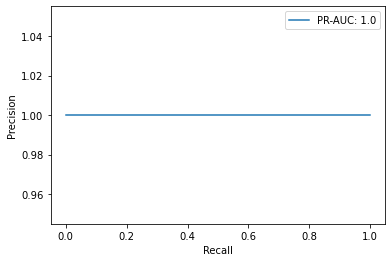

In [69]:
plt.plot(rec, prec, label='PR-AUC: {a}'.format(a=round(auc_pr, 2)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')

RANDOM FOREST MODEL

In [70]:
#RandomForest hyperparameters
from sklearn import ensemble

classif_rf = ensemble.RandomForestClassifier()

classif_rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [71]:
params = {'n_estimators': [200,500],
          'max_features': ['auto','sqrt','log2'],
          'max_depth': [4,5,6,7,8]
         }

classif_RF = ensemble.RandomForestClassifier()
gs_classif_RF = GridSearchCV(estimator=classif_RF, param_grid=params, cv=5, scoring='f1')

gs_classif_RF.fit(df_train_final, train_target)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='f1')

In [72]:
print(gs_classif_RF.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [73]:
# we train the model with the optimal hyperparameters
classif_RF_Opt = ensemble.RandomForestClassifier(max_depth=gs_classif_RF.best_params_['max_depth'], max_features=gs_classif_RF.best_params_['max_features'], n_estimators=gs_classif_RF.best_params_['n_estimators'])
y_pred_RF_Opt = cross_val_predict(classif_RF_Opt, df_train_final, train_target, cv=kfold)

In [74]:
y_pred_RF_Opt.shape

(73714,)

In [75]:
#Confusion matrix
print(confusion_matrix(train_target, y_pred_RF_Opt, labels=[1, 0]))

[[15722    10]
 [    0 57982]]


Worse result compared to Decision Tree classifier as there are incorrect predictions.

From the 15722 positive observations (BP=1), our model has correctly predicted this category in 15722 cases, and badly in 0 cases. This outcome is very good in terms of availability as we allow beam as long as possible.

From the 57992 negative observations (BP=0 or interlock), our model has correctly predicted this category in 57982 cases, and badly in 10 cases. This outcome is good in terms of safety as there is not so many false positives or interlocks action when it is not needed.

In [76]:
print("Accuracy:", accuracy_score(train_target, y_pred_RF_Opt))
print("Precision:", precision_score(train_target, y_pred_RF_Opt))
print("Recall:", recall_score(train_target, y_pred_RF_Opt))
print("F1:", f1_score(train_target, y_pred_RF_Opt))

Accuracy: 0.9998643405594595
Precision: 1.0
Recall: 0.9993643529112637
F1: 0.9996820754117124


Good results but worse than Decision Tree classifier. F1 is pretty close to 1 with a high Accuracy.

In [77]:
print(classification_report(train_target, y_pred_RF_Opt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57982
           1       1.00      1.00      1.00     15732

    accuracy                           1.00     73714
   macro avg       1.00      1.00      1.00     73714
weighted avg       1.00      1.00      1.00     73714



In [78]:
#PR curve
y_proba_RF_Opt = cross_val_predict(classif_RF_Opt, df_train_final, train_target, cv=kfold, method='predict_proba')

[]

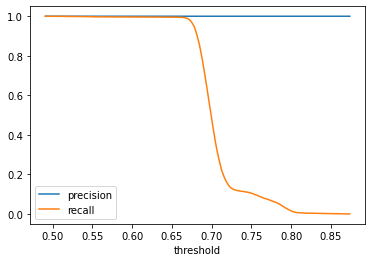

In [79]:
prec, rec, thre = precision_recall_curve(y_true=train_target, probas_pred=y_proba_RF_Opt[:,1])

plt.plot(thre, prec[:-1], label='precision')
plt.plot(thre, rec[:-1], label='recall')
plt.legend(loc='best')
plt.xlabel('threshold')
plt.plot()

Regarding the recall, fast decay from a threshold of approximately 0.65. This implies high sensitivity to the detection of positive category (BP=1) or when beam is allowed, how many times we predict that the beam should be allowed, for thresholds lower than 0.65.

The precision is pretty high from a low threshold. So, the model does not make errors in the prediction of BP=1 (true positives). The opimal threshold (maximum F1 score) is in the cutting point of both curves.

Text(0.5, 1.0, 'Precision-Recall curve')

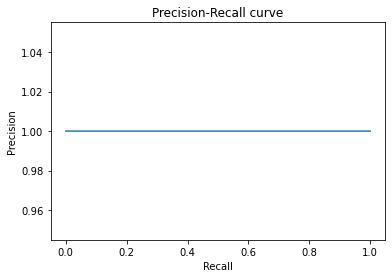

In [80]:
# plot the precision as a function of the recall
plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')

In [81]:
prec, rec, thre = precision_recall_curve(y_true=train_target, probas_pred= y_proba_RF_Opt[:,1])
auc_pr = auc(rec, prec)

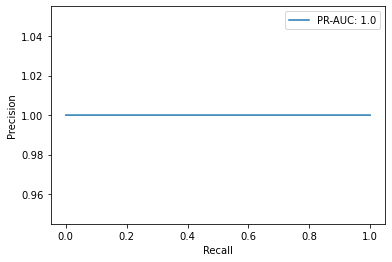

In [82]:
plt.plot(rec, prec, label='PR-AUC: {a}'.format(a=round(auc_pr, 2)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')

Similar outcome as Decision tree classifier with PR-AUC=1

LOGISTIC REGRESSION MODEL

In [83]:
#Logistic Regression hyperparameters
from sklearn.linear_model import LogisticRegression

classif_LR = LogisticRegression()

classif_LR.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [84]:
params = {"C": np.logspace(-3,3,7), 
          "penalty": ['l2']} # solo soporta l2 ridge

gs_classif_LR = GridSearchCV(estimator=classif_LR, param_grid=params, cv=4, scoring='f1')
gs_classif_LR.fit(df_train_final, train_target)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring='f1')

In [85]:
print(gs_classif_LR.best_params_)

{'C': 100.0, 'penalty': 'l2'}


In [86]:
#Train the model with the optimal hyperparameters
classif_LR_Opt = LogisticRegression(C=gs_classif_LR.best_params_['C'], penalty=gs_classif_LR.best_params_['penalty'])
y_pred_LR_Opt = cross_val_predict(classif_LR_Opt, df_train_final, train_target, cv=kfold)

In [87]:
y_pred_LR_Opt.shape

(73714,)

In [88]:
print(confusion_matrix(train_target, y_pred_LR_Opt, labels=[1, 0]))

[[15717    15]
 [    0 57982]]


Similar outcome as Random Forest model. Worse compared to Decision Tree classifier as in Logistic regression there are some false positives.

In [89]:
print("Accuracy:", accuracy_score(train_target, y_pred_LR_Opt))
print("Precision:", precision_score(train_target, y_pred_LR_Opt))
print("Recall:", recall_score(train_target, y_pred_LR_Opt))
print("F1:", f1_score(train_target, y_pred_LR_Opt))

Accuracy: 0.9997965108391893
Precision: 1.0
Recall: 0.9990465293668955
F1: 0.9995230372984832


In [90]:
print(classification_report(train_target, y_pred_LR_Opt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57982
           1       1.00      1.00      1.00     15732

    accuracy                           1.00     73714
   macro avg       1.00      1.00      1.00     73714
weighted avg       1.00      1.00      1.00     73714



Similar outcome as previous models

In [91]:
y_proba_LR_Opt = cross_val_predict(classif_LR_Opt, df_train_final, train_target, cv=kfold, method='predict_proba')

[]

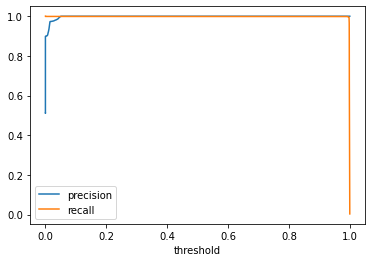

In [92]:
prec, rec, thre = precision_recall_curve(y_true=train_target, probas_pred=y_proba_LR_Opt[:,1])

plt.plot(thre, prec[:-1], label='precision')
plt.plot(thre, rec[:-1], label='recall')
plt.legend(loc='best')
plt.xlabel('threshold')
plt.plot()

Regarding the recall, in this case has a fast decay for higher threshold (arround 1) compared to Random Forest. This implies high sensitivity to the detection of positive category (BP=1) or when beam is allowed, how many times we predict that the beam should be allowed, for thresholds lower than 1.

The precision is pretty high from a low threshold and is stable around 1 from thresholds higher than 0.1. So, the model does not make many errors in the prediction of BP=1 (true positives).

Text(0.5, 1.0, 'Precision-Recall curve')

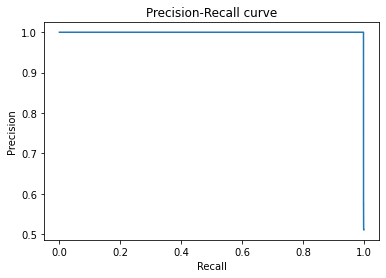

In [93]:
plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')

In [94]:
prec, rec, thre = precision_recall_curve(y_true=train_target, probas_pred= y_proba_LR_Opt[:,1])
auc_pr = auc(rec, prec)

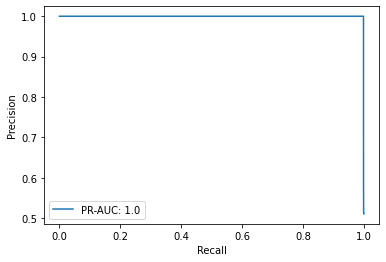

In [95]:
plt.plot(rec, prec, label='PR-AUC: {a}'.format(a=round(auc_pr, 2)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')

Similar outcome as Decision tree classifier or Random Forest with PR-AUC=1

Let's visualise the importance of the predictors to each model

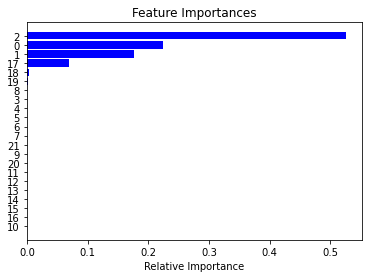

In [96]:
#DECISION TREE
importances = classif_DT_Opt.fit(df_train_final, train_target).feature_importances_
indices = np.argsort(importances)

features = df_train_final.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

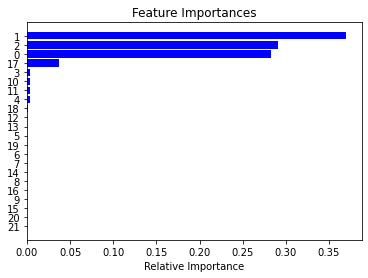

In [97]:
#RANDOM FOREST
importances = classif_RF_Opt.fit(df_train_final, train_target).feature_importances_
indices = np.argsort(importances)

features = df_train_final.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

For the Logistic regression, there is no 'feature importances' attribute

Analysing the outcomes: for both DT and RF the "Beam destination" bits and "Section_1" predictors show the highest importances for the models. The rest of predictors are basically ignored.

Lets evaluate the three models (DT, RF y LR), from the TEST set and the obtained predictions:

In [98]:
#Recover from the original hold-out of the test dataset
test_df = test_set.drop("BP", axis=1).copy()
test_target = test_set["BP"].copy()

In [99]:
#Pipeline calls
test_data_final = pipeline_data.transform(test_df)

#To avoid modifications on the test_df dataset, we make a copy
cpy_df = test_df.copy()

# apply the pipeline to the test_target dataframe and obtain the transformed test_target
pipeline_target.transform(test_target)

201476    0
148230    0
147388    1
166914    0
143016    1
         ..
161052    0
132843    1
198741    0
209428    0
186875    0
Name: BP, Length: 8206, dtype: int64

In [100]:
test_data_final

array([[ 2.00108592, -0.816252  , -0.81703667, ...,  1.73736169,
        -0.25762677, -0.00637962],
       [-0.49972867, -0.816252  ,  1.22393527, ...,  1.73736169,
        -0.25762677, -0.00637962],
       [-0.49972867, -0.816252  , -0.81703667, ...,  1.73736169,
        -0.25762677, -0.00637962],
       ...,
       [ 2.00108592, -0.816252  , -0.81703667, ..., -0.57558539,
        -0.25762677, -0.00637962],
       [ 2.00108592, -0.816252  , -0.81703667, ...,  1.73736169,
        -0.25762677, -0.00637962],
       [-0.49972867,  1.22511186,  1.22393527, ..., -0.57558539,
         3.88158418, -0.00637962]])

In [101]:
from sklearn.metrics import classification_report

#Prediction over the test set for DECISION TREE
pred_DT = classif_DT_Opt.predict(test_data_final)
pred_proba_DT  = classif_DT_Opt.predict_proba(test_data_final)
#Prediction over the test set for RANDOM FOREST
pred_RF = classif_RF_Opt.predict(test_data_final)
pred_proba_RF = classif_RF_Opt.predict_proba(test_data_final)
#Prediction overt the test set for LOGISTIC REGRESSION
classif_LR_Opt.fit(df_train_final, train_target)
pred_LR = classif_LR_Opt.predict(test_data_final)
pred_proba_LR = classif_LR_Opt.predict_proba(test_data_final)

#Reports
target_names = ['BP Nok', 'BP Ok']
print(classification_report(test_target,pred_DT,target_names=target_names))
print(classification_report(test_target,pred_RF,target_names=target_names))
print(classification_report(test_target,pred_LR,target_names=target_names))

              precision    recall  f1-score   support

      BP Nok       1.00      1.00      1.00      6449
       BP Ok       1.00      1.00      1.00      1757

    accuracy                           1.00      8206
   macro avg       1.00      1.00      1.00      8206
weighted avg       1.00      1.00      1.00      8206

              precision    recall  f1-score   support

      BP Nok       1.00      1.00      1.00      6449
       BP Ok       1.00      1.00      1.00      1757

    accuracy                           1.00      8206
   macro avg       1.00      1.00      1.00      8206
weighted avg       1.00      1.00      1.00      8206

              precision    recall  f1-score   support

      BP Nok       1.00      1.00      1.00      6449
       BP Ok       1.00      1.00      1.00      1757

    accuracy                           1.00      8206
   macro avg       1.00      1.00      1.00      8206
weighted avg       1.00      1.00      1.00      8206



Although the three models show very similar results, we choose as "winner" Decision Tree Classifier model as it provides the best confusion matrix results. It also shows very good (optimal) F1 parameter values

Let's apply SHAP to know the potential impact of the predictors on the output of the DECISION TREE CLASSIFIER model

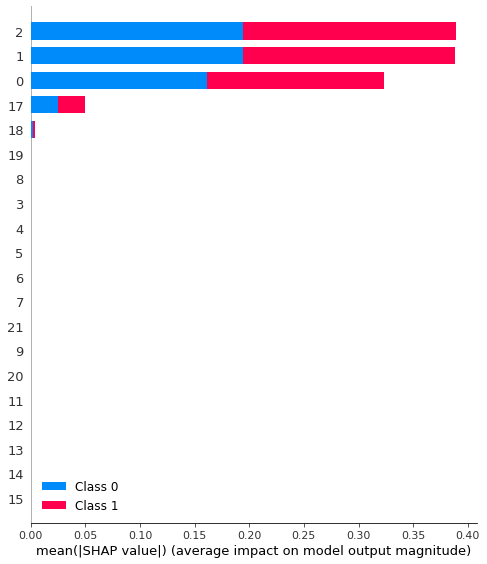

In [102]:
import shap

shap_values = shap.TreeExplainer(classif_DT_Opt).shap_values(df_train_final)
shap.summary_plot(shap_values, df_train_final, plot_type="bar")

High values of the beam destination bits 0,1 and 2 make the prediction more in the direction of "interlock" or BP=0. Similar behaviour occurs for the rest of predictors, although the second most relevant predictor's impact on the model corresponds to Section_1 predictor

LET's EXECUTE the USE-CASES defined in the Project Plan document using DECISION TREE CLASSIFIER (our winner model)

In [104]:
#In order to crosscheck the predictions over the test set, it is important to stress
#that we should observe as input to the model the "cpy_df" dataframe, and look into the prediction on "pred_DT"
#the reason is the transformations done in the target pipeline: removal of senseless destinations and No Beam (BM=0)

#Let's analyse the first 5 inputs:

#for instance, index 147388, there is beam (BM=1), Beam Destination is ISrc, therefore BP should be 1 or ok
#the prediction is right (look into pred_DT[2]) as BP = 1 or nok

cpy_df.head()

,BM,BD_2,BD_1,BD_0,GV1,GV2,GV3,GV4,GV5,GV6,GV7,VBP1,VBP2,VBP3,VBP4,VBP5,VBP6,VBP7
201476,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0
148230,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0
147388,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,0,0
166914,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
143016,1,0,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0


In [107]:
print("DECISION TREE CLASSIFIER")
print(pred_DT)
print(pred_proba_DT)

DECISION TREE CLASSIFIER
[0 0 1 ... 0 0 0]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


USE CASE 1.1: Normal Operation, Beam Permit should be Ok or 1 Let's do our own prediction given a test_example_df1 dataframe: there is beam (BM=1), Beam Destination is LEBT-FC (BD_2=0, BD_1=0, BD_0=1), GV1 and GV2 are open and VBP1 and VBP2 are ok. Therefore BP should be 1 or Ok (Beam Allowed)

In [112]:
test_example_df1 = pandas.DataFrame(
{
    'BM':1,
    'BD_2':0,
    'BD_1':0,
    'BD_0':1,
    'GV1': 1, 'GV2': 1, 'GV3': 0, 'GV4':0, 'GV5': 0, 'GV6': 0, 'GV7': 0,
    'VBP1':1, 'VBP2': 1, 'VBP3':0, 'VBP4':0, 'VBP5':0, 'VBP6': 0, 'VBP7':0,
}, columns = ['BM', 'BD_2' ,'BD_1', 'BD_0', 'GV1', 'GV2', 'GV3', 'GV4', 'GV5', 'GV6', 'GV7', 'VBP1', 'VBP2', 'VBP3', 'VBP4', 'VBP5', 'VBP6', 'VBP7'], index=[0]
)

In [113]:
test_example_df1

,BM,BD_2,BD_1,BD_0,GV1,GV2,GV3,GV4,GV5,GV6,GV7,VBP1,VBP2,VBP3,VBP4,VBP5,VBP6,VBP7
0,1,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0


In [114]:
#In order to be applied to the model, this example has to be transformed applying the data pipeline
test_example_transformed = pipeline_data.transform(test_example_df1)

In [115]:
#Make the predictions with our trained models
print("DECISION TREE CLASSIFIER")
print(classif_DT_Opt.predict(test_example_transformed))
print(classif_DT_Opt.predict_proba(test_example_transformed))

DECISION TREE CLASSIFIER
[1]
[[0. 1.]]


The prediction is right: BP is 1 or ok with a probability 100%

USE CASE 1.2: Interlocks caused by a vacuum sector gate valve closed upstream beam destination Let's do our own prediction given a test_example_df2 dataframe: there is beam (BM=1), Beam Destination is MEBT-FC (BD_2=0, BD_1=1, BD_0=0), GV1 is closed and the rest open and VBPs are all ok. Therefore BP should be 0 or Not ok (Beam Interlocked)

In [116]:
test_example_df2 = pandas.DataFrame(
{
    'BM':1,
    'BD_2':0,
    'BD_1':1,
    'BD_0':0,
    'GV1': 0, 'GV2': 1, 'GV3': 1, 'GV4':1, 'GV5': 1, 'GV6': 1, 'GV7': 1,
    'VBP1':1, 'VBP2': 1, 'VBP3':1, 'VBP4':1, 'VBP5':1, 'VBP6': 1, 'VBP7':1,
}, columns = ['BM', 'BD_2' ,'BD_1', 'BD_0', 'GV1', 'GV2', 'GV3', 'GV4', 'GV5', 'GV6', 'GV7', 'VBP1', 'VBP2', 'VBP3', 'VBP4', 'VBP5', 'VBP6', 'VBP7'], index=[0]
)

test_example_transformed = pipeline_data.transform(test_example_df2)
print("DECISION TREE CLASSIFIER")
print(classif_DT_Opt.predict(test_example_transformed))
print(classif_DT_Opt.predict_proba(test_example_transformed))

DECISION TREE CLASSIFIER
[0]
[[1. 0.]]


Correct! the BP=0 or ok with a probability of 100%

USE CASE 1.3: Interlocks caused by a vacuum pressure sensor not ok upstream beam destination Let's do our own prediction given a test_example_df3 dataframe: there is beam (BM=1), Beam Destination is MEBT-FC (BD_2=0, BD_1=1, BD_0=0), all GVs open, VBP1 nok and the rest ok. Therefore BP should be 0 or Not ok (Beam Interlocked)

In [117]:
test_example_df3 = pandas.DataFrame(
{
    'BM':1,
    'BD_2':0,
    'BD_1':1,
    'BD_0':0,
    'GV1': 1, 'GV2': 1, 'GV3': 1, 'GV4':1, 'GV5': 1, 'GV6': 1, 'GV7': 1,
    'VBP1':0, 'VBP2': 1, 'VBP3':1, 'VBP4':1, 'VBP5':1, 'VBP6': 1, 'VBP7':1,
}, columns = ['BM', 'BD_2' ,'BD_1', 'BD_0', 'GV1', 'GV2', 'GV3', 'GV4', 'GV5', 'GV6', 'GV7', 'VBP1', 'VBP2', 'VBP3', 'VBP4', 'VBP5', 'VBP6', 'VBP7'], index=[0]

)

test_example_transformed = pipeline_data.transform(test_example_df3)
print("DECISION TREE CLASSIFIER")
print(classif_DT_Opt.predict(test_example_transformed))
print(classif_DT_Opt.predict_proba(test_example_transformed))

DECISION TREE CLASSIFIER
[0]
[[1. 0.]]


Prediction is Ok as BP=0 with the highest probability

USE CASE 2.3.2: Answer the question if a vacuum pressure gauge can be removed from the installation without causing an interlock, if it is located downstream beam destination. BP should be Ok. Let's do our own prediction given a test_example_df4 dataframe: there is beam (BM=1), Beam Destination is LEBT-FC (BD_2=0, BD_1=0, BD_0=1), all GVs open, VBP3 and VBP4 nok and the rest ok. Therefore BP should be 1 or Ok (Beam Allowed)

In [118]:
test_example_df4 = pandas.DataFrame(
{
    'BM':1,
    'BD_2':0,
    'BD_1':0,
    'BD_0':1,
    'GV1': 1, 'GV2': 1, 'GV3': 1, 'GV4':1, 'GV5': 1, 'GV6': 1, 'GV7': 1,
    'VBP1':1, 'VBP2': 1, 'VBP3':0, 'VBP4':0, 'VBP5':1, 'VBP6': 1, 'VBP7':1,
}, columns = ['BM', 'BD_2' ,'BD_1', 'BD_0', 'GV1', 'GV2', 'GV3', 'GV4', 'GV5', 'GV6', 'GV7', 'VBP1', 'VBP2', 'VBP3', 'VBP4', 'VBP5', 'VBP6', 'VBP7'], index=[0]

)

test_example_transformed = pipeline_data.transform(test_example_df4)
print("DECISION TREE CLASSIFIER")
print(classif_DT_Opt.predict(test_example_transformed))
print(classif_DT_Opt.predict_proba(test_example_transformed))

DECISION TREE CLASSIFIER
[1]
[[0. 1.]]


Right prediction! with the highest probability

The model works good for the full NCL (Normal Conducting LINAC) including the 5 beam destinations, for seven gate valves GV1..GV7 and seven VBP1..VBP7 vacumm beam permits.

The model can be saved for example using mlflow:

In [119]:
import mlflow.sklearn

mlflow.sklearn.save_model(classif_RF_Opt, "./DT_Proj")